## IPL - First Innings Score Prediction

In [1]:
# importing libraries
import pickle     # pickle is used to create a model file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the Dataset
df = pd.read_csv(r'C:\Users\Dexter\Documents\ML Projects\IPL FIRST INNING SCORE PREDICTION\ipl.csv')

In [3]:
# head gives the top 5 rows of the given dataset
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
# tail gives the bottom 5 rows of the given dataset
df.tail()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129
76013,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129,8,19.6,47,1,47,13,129


## Data Cleaning

In [5]:
# Removing unwanted columns
columns_to_remove = ['mid', 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [6]:
# After dropping columns, lets see tha data
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [7]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

There are so many teams so we dont required all that we only required the consistent team

In [8]:
# Keeping only consistent teams
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [9]:
# Filtering out all the team considering the consistent team
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

I am basically filtering out whichever teams are actually present in 'consistent_teams' from 'bat_team' & 'bowl_team' I am going to take only those records

In [10]:
print(df['bat_team'].unique())
print('\n')
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']


['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [11]:
# Removing the first 5 overs data in every match
df = df[df['overs']>=5.0]

Atleast we required 5 over data to predict, thatswhy we take over greater than or equal to 5 over.

In [12]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

## Data Preprocessing
By seeing the data we have two categorical features ['bat_team' & 'bowl_team'], so we using one_hot_encoding to convert categorical features to numerical form.

In [13]:
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])

In [14]:
encoded_df.head()

,date,venue,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,M Chinnaswamy Stadium,61,0,5.1,59,0,222,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,M Chinnaswamy Stadium,61,1,5.2,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,M Chinnaswamy Stadium,61,1,5.3,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,M Chinnaswamy Stadium,61,1,5.4,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,M Chinnaswamy Stadium,61,1,5.5,58,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0


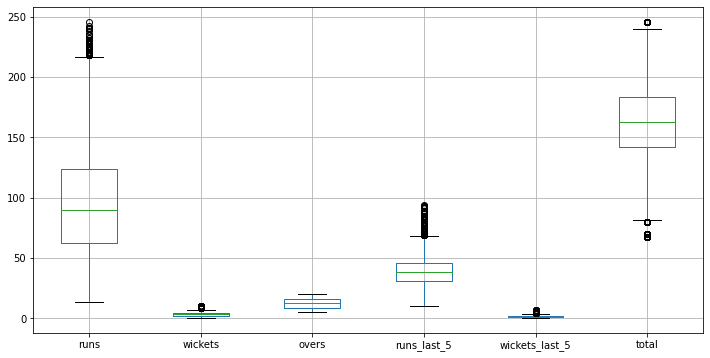

In [15]:
# plotting boxplot to understand how many outliers are there in our data
plt.figure(figsize=(12, 6))
df.boxplot()
plt.show()

In [18]:
#Dropping outliers buy using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

#Dropping Outliers for specific columns
drop_outlier = ['runs','wickets','runs_last_5','wickets_last_5', 'total']
df = df[~((df[drop_outlier] < (Q1 - 1.5*IQR)) | (df[drop_outlier] > (Q3 + 1.5*IQR))).any(axis=1)]

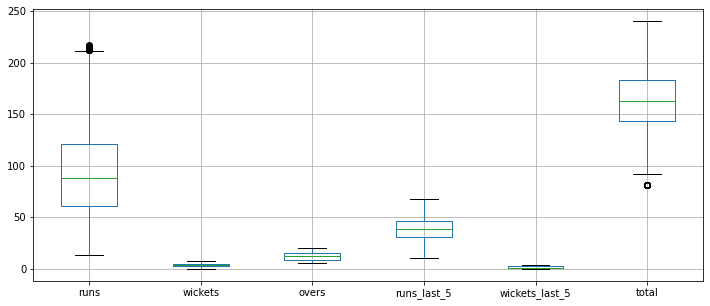

In [60]:
plt.figure(figsize=(12, 5))
df.boxplot()
plt.show()

In [19]:
encoded_df.columns

Index(['date', 'venue', 'runs', 'wickets', 'overs', 'runs_last_5',
       'wickets_last_5', 'total', 'bat_team_Chennai Super Kings',
       'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [20]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

As 'total' is my output so I am just rearrange the data because it will help us to split with respect to traning and testing.


This is baisically a time series kind of data, we split the data on the based of time itself. [Remember : train_test_split could not be done randomly for time series kind of data

In [21]:
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]   # the data is less than or equal to 2016 we put in the training dataset
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]    # the data is greater than or equal to 2017 we put in the test dataset

y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values   # similar for y_train the data is less than or equal to 2016 we put in the training
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values    # and for y_test the data is greater than or equal to 2017 we put in the test 

# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)        # date column is not required right now, so drop it [we just used date column for train_test_split]
X_test.drop(labels='date', axis=True, inplace=True)

print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (37330, 21) and Test set: (2778, 21)


## Model Building
* **Liner Regression**
* **Ridge regression**
* **Lasso regression**
* **Decision Tree Regression**
* **Random Forest regression**

## Linear Regression

In [22]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [23]:
#Checking efficiency of training model
regressor.score(X_train,y_train)

0.6502133812161469

In [24]:
# Predicting the  results
y_pred = regressor.predict(X_test) 

In [25]:
# Linear Regression - Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Calculating MAE, MSE, RMSE, R^2, Adjusted R^2
MAE = mean_absolute_error((y_test),(y_pred))
print("MAE :", MAE)

MSE = mean_squared_error((y_test),(y_pred))
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

R2 = r2_score((y_test), (y_pred))
print("R2 :" , R2)

Adjusted_R2 =1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2:", Adjusted_R2) 

MAE : 12.118617546193294
MSE : 251.00792310417438
RMSE : 15.843229566732106
R2 : 0.7522633566350527
Adjusted R2: 0.7503756681333604


<AxesSubplot:ylabel='Density'>

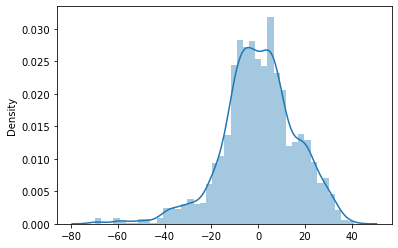

In [26]:
# plotting histogram for Linear regression
sns.distplot(y_test-y_pred)

## Ridge Regression

In [27]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [28]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1,5,10,15,20,25,30,40,50]}   # I have taken different values so that I give it for hyperparameter tuning
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 1,
                                   5, 10, 15, 20, 25, 30, 40, 50]},
             scoring='neg_mean_squared_error')

In [29]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 50}
-328.34615829692024


In [30]:
ridge_pred=ridge_regressor.predict(X_test)

<AxesSubplot:ylabel='Density'>

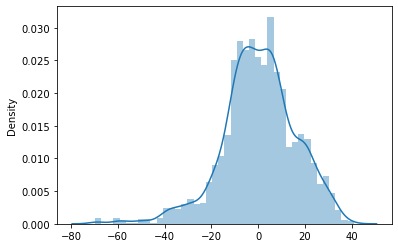

In [31]:
#plotting graph for Ridge regression
sns.distplot(y_test-ridge_pred) 

In [32]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, ridge_pred))
print('MSE:', metrics.mean_squared_error(y_test, ridge_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print('R2:', metrics.r2_score(y_test, ridge_pred))
print('Adjusted_R2:',1-(1-r2_score(y_test,ridge_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MAE: 12.116975720986472
MSE: 251.03781533560874
RMSE: 15.844172914217035
R2: 0.752233853976385
Adjusted_R2: 0.7503459406721412


## Lasso Regression

In [33]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [34]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1,5,10,15,20,30,35,40,50]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 1,
                                   5, 10, 15, 20, 30, 35, 40, 50]},
             scoring='neg_mean_squared_error')

In [35]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-320.82637898585256


In [36]:
lasso_pred=lasso_regressor.predict(X_test)

<AxesSubplot:ylabel='Density'>

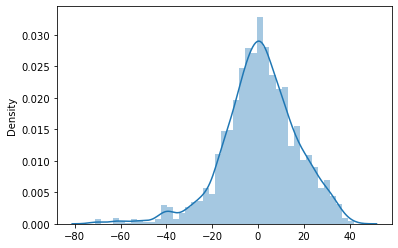

In [37]:
#plotting graph for Lasso regression
sns.distplot(y_test-lasso_pred) 

In [38]:
print('MAE:', metrics.mean_absolute_error(y_test, lasso_pred))
print('MSE:', metrics.mean_squared_error(y_test, lasso_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))
print('R2:', metrics.r2_score(y_test, lasso_pred))
print('Adjusted_R2:',1-(1-r2_score(y_test,lasso_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MAE: 12.214053814850248
MSE: 262.37973664007154
RMSE: 16.198139912967523
R2: 0.7410397471190056
Adjusted_R2: 0.7390665376449486


## Decision Tree Regression

In [39]:
from sklearn.tree import DecisionTreeRegressor
dtr_regressor = DecisionTreeRegressor()
dtr_params = {'max_depth':[2,4,6,8,10],
               'min_samples_leaf':[2,4,6,8,10,12],
               'min_samples_split':[2,4,6,8,10,12,15]}
dtr_model = GridSearchCV(dtr_regressor,dtr_params, scoring = 'neg_mean_squared_error', cv=8)               
dtr_model.fit(X_train,y_train)

GridSearchCV(cv=8, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 15]},
             scoring='neg_mean_squared_error')

In [40]:
print(dtr_model.best_params_)
print(dtr_model.best_score_)

{'max_depth': 8, 'min_samples_leaf': 12, 'min_samples_split': 4}
-407.2635153841204


In [41]:
# Predicting results
dtr_pred = dtr_model.predict(X_test)

In [42]:
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))
print('R2:', metrics.r2_score(y_test, dtr_pred))
print('Adjusted_R2:',1-(1-r2_score(y_test,dtr_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MAE: 15.361006688436957
MSE: 379.77468164799427
RMSE: 19.487808538878717
R2: 0.6251747606093758
Adjusted_R2: 0.622318690207633


In [43]:
dtr_pred=dtr_model.predict(X_test)

<AxesSubplot:ylabel='Density'>

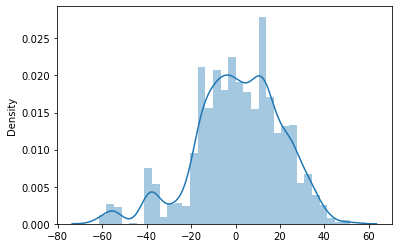

In [44]:
#plotting graph for Lasso regression
sns.distplot((y_test-dtr_pred))

## Random Forest Regression

In [45]:
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_params = {'max_depth':[2,4,6,8,10],
               'min_samples_leaf':[2,4,6,8,10],
               'min_samples_split':[2,4,6,8,10]}
rf_model = GridSearchCV(random_regressor,random_params, scoring = 'neg_mean_squared_error', cv=3)               
rf_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='neg_mean_squared_error')

In [46]:
print(rf_model.best_params_)
print(rf_model.best_score_)

{'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 2}
-385.71490953416395


In [47]:
# Predicting results
rf_pred = rf_model.predict(X_test)

In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))
print('R2:', metrics.r2_score(y_test, rf_pred))
print('Adjusted_R2:',1-(1-r2_score(y_test,rf_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MAE: 13.933873302575142
MSE: 311.312639257165
RMSE: 17.644053934885967
R2: 0.6927445662556052
Adjusted_R2: 0.6904033601203976


<AxesSubplot:ylabel='Density'>

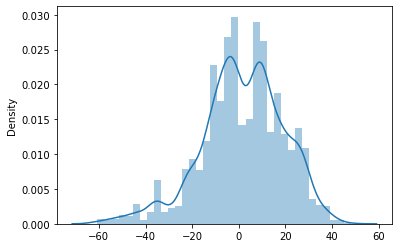

In [49]:
#plotting graph for Random Forest regression
sns.distplot((y_test-rf_pred) )

In [50]:
#Comparison between algorithms 
accuracy_list = ['MSE','RMSE',"R2","Adjusted_R2"]
reg_models = [regressor,ridge_regressor,lasso_regressor,dtr_model,rf_model]

def error_matrix(Y):
  MSE = mean_squared_error(y_test,Y)
  RMSE = np.sqrt(MSE)
  R_2 = r2_score(y_test,Y)
  Adj_R2 = 1-(1-r2_score(y_test,Y))*(X_test.shape[0]-1)/((X_test.shape[0]-X_test.shape[1]-1))

  return MSE,RMSE,R_2,Adj_R2

def training_accuracy(models):
  train_accuracy = []
  for model in reg_models:
    model.fit(X_train,y_train)
    train_accuracy.append(model.score(X_train,y_train))
  return train_accuracy



accuracy_df = pd.DataFrame(index = accuracy_list)
accuracy_df['Linear Regression'] = error_matrix(y_pred)
accuracy_df['Ridge'] = error_matrix(ridge_pred)
accuracy_df['Lasso'] = error_matrix(lasso_pred)
accuracy_df['Decision Tree'] = error_matrix(dtr_pred)
accuracy_df['Random Forest'] = error_matrix(rf_pred)
accuracy_df.loc['Training Accuracy'] = training_accuracy(reg_models)
accuracy_df

,Linear Regression,Ridge,Lasso,Decision Tree,Random Forest
MSE,251.007923,251.037815,262.379737,379.774682,311.312639
RMSE,15.843230,15.844173,16.198140,19.487809,17.644054
R2,0.752263,0.752234,0.741040,0.625175,0.692745
Adjusted_R2,0.750376,0.750346,0.739067,0.622319,0.690403
Training Accuracy,0.650213,-307.323162,-317.571647,-278.175724,-181.475650


In [51]:
# Creating a pickle file where you want to store the data
import pickle
filename = 'first-innings-score-model.pkl'
# dump information to that file
pickle.dump(reg_models, open(filename, 'wb'))

In [61]:
%pwd

'C:\\Users\\Dexter\\Documents'

## Prediction
* Model trained on the data from IPL Seasons 1 to 9 ie: (2008 to 2016)
* Model tested on data from IPL Season 10 ie: (2017)
* Model predicts on data from IPL Seasons 11 to 12 ie: (2018 to 2019)

*Note: In IPL, it is very difficult to predict the actual score because in a moment of time the game can completely turn upside down!*

In [52]:
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
  temp_array = list()

  # Batting Team
  if batting_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
  temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

  # Converting into numpy array
  temp_array = np.array([temp_array])

  # Prediction
  return int(regressor.predict(temp_array)[0])

## Prediction 1
* Date: 14th April 2019
* IPL : Season 12
* Match number: 30
* Teams: Sunrisers Hyderabad vs. Delhi Daredevils
* First Innings final score: 155/7

In [53]:
final_score = predict_score(batting_team='Delhi Daredevils', bowling_team='Sunrisers Hyderabad', overs=11.5, runs=98, wickets=3, runs_in_prev_5=41, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 157 to 172


## Prediction 2
* Date: 10th May 2019
* IPL : Season 12
* Match number: 59 (Eliminator)
* Teams: Delhi Daredevils vs. Chennai Super Kings
* First Innings final score: 147/9

In [54]:
final_score = predict_score(batting_team='Delhi Daredevils', bowling_team='Chennai Super Kings', overs=10.2, runs=68, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 137 to 152


## Prediction 3
* Date: 11th April 2019
* IPL : Season 12
* Match number: 25
* Teams: Rajasthan Royals vs. Chennai Super Kings
* First Innings final score: 151/7

In [55]:
final_score = predict_score(batting_team='Rajasthan Royals', bowling_team='Chennai Super Kings', overs=13.3, runs=92, wickets=5, runs_in_prev_5=27, wickets_in_prev_5=2)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 128 to 143


## Prediction 4
* Date: 30th March 2019
* IPL : Season 12
* Match number: 9
* Teams: Mumbai Indians vs. Kings XI Punjab
* First Innings final score: 176/7

In [56]:
final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=12.3, runs=113, wickets=2, runs_in_prev_5=55, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 179 to 194


## Prediction 5
* Date: 17th May 2018
* IPL : Season 11
* Match number: 50
* Teams: Mumbai Indians vs. Kings XI Punjab
* First Innings final score: 186/8

In [57]:
final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=14.1, runs=136, wickets=4, runs_in_prev_5=50, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 180 to 195


## Prediction 6
* Date: 16th April 2018
* IPL : Season 11
* Match number: 13
* Teams: Kolkata Knight Riders vs. Delhi Daredevils
* First Innings final score: 200/9

In [58]:
final_score = predict_score(batting_team='Kolkata Knight Riders', bowling_team='Delhi Daredevils', overs=9.2, runs=79, wickets=2, runs_in_prev_5=60, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 159 to 174


## Prediction 7
* Date: 7th May 2018
* IPL : Season 11
* Match number: 39
* Teams: Sunrisers Hyderabad vs. Royal Challengers Bangalore
* First Innings final score: 146/10

In [59]:
final_score = predict_score(batting_team='Sunrisers Hyderabad', bowling_team='Royal Challengers Bangalore', overs=10.5, runs=67, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 138 to 153
